# Inventory Demand Prediction For Manufactoring Company A

## 1- Business Understanding


**Problem Statement:** Many companies encountered difficulties in determining optimal balance in inventory holding costs and spare part stocks.

1. Spare part demand is unpredictable and depends on downtime planning.
2. Items that are kept but not in use lead to waste.
3. Poor planning causes spare part shortages and affects unplanned downtime in the factory.

**Obejctive:** To build machine learning models to predict spare part demand of a time series data for Rank A items.  

**Goal:** Choose the champion model in predicting spare part demand

## 2- Analytic Approach

**1. Data Collection and Data Wrangling**

* Data Sources: Identify and gather relevant time series data from Company A. This includes historical demand data, downtime records, inventory levels, and any other relevant factors.
* Data Wrangling: Handle missing values, outliers, and inconsistencies. Ensure that data is in a suitable format for analysis.

**2. Exploratory Data Analysis (EDA)**

* Trend Analysis: Examine historical demand trends, seasonal patterns, and any anomalies.
* Visualization: Use plots to visualize demand patterns, seasonality, and the relationship between features and demand.
* Correlation Analysis: Assess how various features correlate with demand to inform feature selection.

**3. Model Selection and Development**

* Model Types: Evaluate various machine learning and time series models, including but not limited to:
* Machine Learning Models: Linear Regression, Polynomial Regression, Decision Tree, Random Forest, XGBoost models
* Model Training: Split the data into training and validation sets. Train multiple models using the training data and fine-tune hyperparameters.
* Cross-Validation: Implement cross-validation techniques to assess model performance and avoid overfitting.

**4. Model Evaluation**

* Metrics: Choose appropriate evaluation metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared to assess model accuracy.
* Comparison: Compare the performance of different models using the evaluation metrics to determine the best-performing model.

**5. Model Selection**

* Champion Model: Select the model with the best performance based on the evaluation metrics.
* Interpretation: Analyze the results to understand model predictions and validate them with domain knowledge.

**6. Implementation and Monitoring**

* Deployment: Implement the champion model for real-time forecasting or periodic updates.
* Monitoring: Continuously monitor the model’s performance and make adjustments as necessary based on feedback and new data.

**7. Reporting and Documentation**

* Results: Document the findings, including the model selection process, performance metrics, and recommendations.
* Presentation: Prepare a detailed report or presentation to communicate results and insights to stakeholders.

## 3-  Data Requirements

| Parameter           | Description                                          | Type of Attribute |
|---------------------|------------------------------------------------------|-------------------|
| Material            | Spare part unique ID number                         | Categorical       |
| Material Description| Spare part detail description registered in the system | Categorical       |
| Net Price           | Price of item per purchase per unit                 | Numerical         |
| Currency            | Currency of purchase transaction                    | Categorical       |
| Entry Unit          | Stock keeping unit of item                          | Categorical       |
| GI Date             | Date of spare part usage transaction                 | Object            |
| Month               | The month of spare part usage transaction            | Categorical       |
| Year                | Year of spare part usage transaction                 | Categorical       |
| Storage Location    | Central warehouse location                           | Categorical       |
| GI/GR Qty           | Spare part usage quantity                            | Numerical         |
| GI/GR Pr            | Spare part usage price                               | Numerical         |
| Cost Centre         | The department charged for the usage transaction     | Categorical       |
| Receiving Plant     | The factory charged for the usage transaction        | Categorical       |
| Material Document   | Transaction unique ID number                         | Categorical       |


## 4- Data Collection

Data Collection for the inventory forecasting involves acquiring comprehensive historical data on spare part usage to build accurate predictive models. Key sources include inventory management systems for data on spare part transactions, maintenance logs detailing downtime events, and procurement records for inventory levels and reordering information. Collect data on various attributes such as spare part IDs, quantities used, prices, storage locations, and timestamps of transactions. Ensure data spans a sufficient time period to capture demand patterns and seasonality. Verify the quality and completeness of the collected data to support robust forecasting and accurate model performance.

## 5- Data Understanding

Data Understanding involves analyzing the collected data to gain insights critical for the inventory forecasting. This includes examining the dataset to identify and describe key features such as spare part IDs, demand quantities, prices, and transaction timestamps. Assess the quality of the data by checking for missing values, inconsistencies, and accuracy issues. Analyze demand patterns to identify trends, seasonality, and anomalies that may affect forecasting. Explore relationships between features, such as the impact of price changes or storage locations on demand. Use descriptive statistics and visualizations to summarize and interpret the data, forming a basis for feature engineering and model development. This thorough understanding ensures that the data is well-prepared and relevant for accurate demand prediction.

## 6- Data Preparation

 Import all the necessary libraries that we need to analyze the inventory data with python:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install -q hvplot
!pip install hvplot   # Install hvplot separately
import hvplot.pandas  # Now import hvplot
from scipy import stats
!pip install gradio

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [ ]:
df = pd.read_csv('Inventory.csv', encoding='latin-1')
df.head()

,Material,Material Description,Net Price,Currency,Entry Unit,GI Date,Month,Year,Stor. Loc.,GI/GR Qty,GI/GR Pr,Cost Ctr,Rec. Plant,Mat. Doc.
0,30000009,"HOLLOW BAR(M/S)11/2''X11/2'' X1/8""X20'",47.53,MYR,UNI,25/10/2023,October,2023,SC04,30,"1,425.90",1109602,1109,4932168003
1,30000010,"HOLLOW BAR(M/S) 1"" X 2"" X 3MM",47.53,MYR,UNI,25/10/2023,October,2023,SC04,10,475.3,1109602,1109,4932168003
2,30000010,"HOLLOW BAR(M/S) 1"" X 2"" X 3MM",47.53,MYR,UNI,27/11/2023,November,2023,SC04,13,617.89,1109602,1109,4932924966
3,30000010,"HOLLOW BAR(M/S) 1"" X 2"" X 3MM",47.53,MYR,UNI,28/11/2023,November,2023,SC04,15,712.95,1109602,1109,4932967893
4,30000010,"HOLLOW BAR(M/S) 1"" X 2"" X 3MM",47.53,MYR,UNI,24/12/2023,December,2023,SC04,8,380.24,1110602,1110,4933556951


In [ ]:
df.shape

(43481, 14)

 To analyze this inventory data in a better way we need to first look at how is the data distributed into columns. So let’s have a quick look at the columns of the dataset:

In [ ]:
df.columns

Index(['Material', 'Material Description', 'Net Price', 'Currency',
       'Entry Unit', 'GI Date', 'Month', 'Year', 'Stor. Loc.', 'GI/GR Qty',
       ' GI/GR Pr', 'Cost Ctr', 'Rec. Plant', 'Mat. Doc.'],
      dtype='object')

To gain a comprehensive overview of the dataset, the `df.info()` method was used. This function provides essential information about the DataFrame, including the number of non-null entries, data types of each feature, and memory usage. Understanding these aspects is crucial for several reasons:

1. **Data Types**: `df.info()` helps identify if the data types are correctly inferred by Python. For example, dates might be recognized as objects instead of datetime, or numerical features could be interpreted as objects due to mixed data types or missing values.
2. **Missing Values**: The method highlights features with missing values, allowing us to address these gaps through imputation or removal to ensure robust model performance.
3. **Memory Usage**: Understanding the memory footprint is important, especially for large datasets, as it impacts computational efficiency during model training and evaluation.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43481 entries, 0 to 43480
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Material              43481 non-null  int64 
 1   Material Description  43481 non-null  object
 2   Net Price             43481 non-null  object
 3   Currency              43481 non-null  object
 4   Entry Unit            43481 non-null  object
 5   GI Date               43481 non-null  object
 6   Month                 43481 non-null  object
 7   Year                  43481 non-null  int64 
 8   Stor. Loc.            43481 non-null  object
 9   GI/GR Qty             43481 non-null  object
 10   GI/GR Pr             43481 non-null  object
 11  Cost Ctr              43481 non-null  object
 12  Rec. Plant            43481 non-null  object
 13  Mat. Doc.             43481 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 4.6+ MB


Based on the output of `df.info()`, we identified features where the data type needed adjustment. For instance, the `GI Date` feature was initially recognized as an object, but converting it to a datetime format is essential for time series analysis. Similarly, categorical features such as `Material` was appropriately converted to categorical data types to optimize memory usage and improve model performance.

## 7- Data Wrangling

In [ ]:
df[' GI/GR Pr'] = df[' GI/GR Pr'].astype(float)

ValueError: could not convert string to float: '1,425.90'

During the data wrangling process, we encountered an issue while attempting to convert the `Net Price`,`GI/GR Pr`,`GI/GR Qty` feature from an object to a float. The conversion failed due to the presence of commas in the numerical values, resulting in the following error:

ValueError: could not convert string to float: '1,425.90'

To resolve this issue, we used the `replace` function and replaced the commas with empty strings to ensure that the numerical values are correctly formatted for conversion

In [ ]:
#Replace commas into empty string and convert data types
df['Net Price'] = df['Net Price'].str.replace(',', '').astype(float)
df[' GI/GR Pr'] = df[' GI/GR Pr'].str.replace(',', '').astype(float)

#Removing decimal points in 'Rec. Plant'and convert the data types
df['Rec. Plant'] = df['Rec. Plant'].astype(str).str.replace('.0', '', regex=False)
df['Material'] = df['Material'].astype(str)
df['Mat. Doc.'] = df['Mat. Doc.'].astype(str)
df['Month'] = df['Month'].astype(str)
df['Year'] = df['Year'].astype(str)

#Convert dtype 'GI Date' to date
df['GI Date'] = pd.to_datetime(df['GI Date'])
#df['Month'] = df['GI Date'].dt.month
#df['Year'] = df['GI Date'].dt.year

<ipython-input-593-5f5da9ff73a2>:13: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['GI Date'] = pd.to_datetime(df['GI Date'])


In [ ]:
# prompt: convert GI/GR Qty into interger
df['GI/GR Qty'] = df['GI/GR Qty'].str.replace(',', '').astype(float).astype(int)
# Remove commas, convert to float, then to integer

By rechecking the data types using `df.info()`, we confirm that all data types are appropriately set for subsequent analysis and modeling.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43481 entries, 0 to 43480
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Material              43481 non-null  object        
 1   Material Description  43481 non-null  object        
 2   Net Price             43481 non-null  float64       
 3   Currency              43481 non-null  object        
 4   Entry Unit            43481 non-null  object        
 5   GI Date               43481 non-null  datetime64[ns]
 6   Month                 43481 non-null  object        
 7   Year                  43481 non-null  object        
 8   Stor. Loc.            43481 non-null  object        
 9   GI/GR Qty             43481 non-null  int64         
 10   GI/GR Pr             43481 non-null  float64       
 11  Cost Ctr              43481 non-null  object        
 12  Rec. Plant            43481 non-null  object        
 13  Mat. Doc.       

To check whether the columns are numerical or categorical we used the `select_dtypes` fucntion provided by pandas. This method allows us to select columns based on their data types.

Here's the code to identify and print the numerical and categorical columns:

In [ ]:
numerical_cols = df.select_dtypes(include=['float', 'int']).columns
categorical_cols = df.select_dtypes(include=['object', 'datetime']).columns

print("Numerical Columns:")
print(numerical_cols)

print("\nCategorical Columns:")
print(categorical_cols)


Numerical Columns:
Index(['Net Price', 'GI/GR Qty', ' GI/GR Pr'], dtype='object')

Categorical Columns:
Index(['Material', 'Material Description', 'Currency', 'Entry Unit', 'GI Date',
       'Month', 'Year', 'Stor. Loc.', 'Cost Ctr', 'Rec. Plant', 'Mat. Doc.'],
      dtype='object')


In [ ]:
df.head()

,Material,Material Description,Net Price,Currency,Entry Unit,GI Date,Month,Year,Stor. Loc.,GI/GR Qty,GI/GR Pr,Cost Ctr,Rec. Plant,Mat. Doc.
0,30000009,"HOLLOW BAR(M/S)11/2''X11/2'' X1/8""X20'",47.53,MYR,UNI,2023-10-25,October,2023,SC04,30,1425.90,1109602,1109,4932168003
1,30000010,"HOLLOW BAR(M/S) 1"" X 2"" X 3MM",47.53,MYR,UNI,2023-10-25,October,2023,SC04,10,475.30,1109602,1109,4932168003
2,30000010,"HOLLOW BAR(M/S) 1"" X 2"" X 3MM",47.53,MYR,UNI,2023-11-27,November,2023,SC04,13,617.89,1109602,1109,4932924966
3,30000010,"HOLLOW BAR(M/S) 1"" X 2"" X 3MM",47.53,MYR,UNI,2023-11-28,November,2023,SC04,15,712.95,1109602,1109,4932967893
4,30000010,"HOLLOW BAR(M/S) 1"" X 2"" X 3MM",47.53,MYR,UNI,2023-12-24,December,2023,SC04,8,380.24,1110602,1110,4933556951


We decided to drop the columns `Material`, `Currency`, `Entry Unit`, and `Mat. Doc.` Below is an explanation of the reasons for dropping these specific columns:

`Material`:
The Material column contains unique identifiers for each spare part. While this information is important for inventory tracking, we will be using the Material Description column instead, which provides more descriptive and meaningful information about the spare parts. This allows for better encoding and feature extraction. Hence, the Material column can be dropped to avoid redundancy.

`Currency`:
The Currency column specifies the currency in which transactions are made. For the purpose of demand forecasting, the currency type does not directly impact the quantity of spare parts used. This column can be removed to focus on more relevant features.

`Entry Unit`:
The Entry Unit column indicates the stock-keeping unit (SKU) of each item. Similar to the Material column, the specific SKU may not provide meaningful information for predicting demand. Dropping this column helps in streamlining the dataset without losing valuable predictive insights.

`Mat. Doc.`:
The Material Document column contains unique transaction IDs for each spare part usage. This column serves as an identifier for individual transactions but does not contribute to the prediction of future demand. Removing this column helps to avoid overfitting and reduces the dimensionality of the data.

In [ ]:
# Drop columns and assign the modified DataFrame to 'df2'
df2 = df.drop(['Material', 'Currency','Entry Unit','Mat. Doc.'], axis=1)
df2.head()

,Material Description,Net Price,GI Date,Month,Year,Stor. Loc.,GI/GR Qty,GI/GR Pr,Cost Ctr,Rec. Plant
0,"HOLLOW BAR(M/S)11/2''X11/2'' X1/8""X20'",47.53,2023-10-25,October,2023,SC04,30,1425.90,1109602,1109
1,"HOLLOW BAR(M/S) 1"" X 2"" X 3MM",47.53,2023-10-25,October,2023,SC04,10,475.30,1109602,1109
2,"HOLLOW BAR(M/S) 1"" X 2"" X 3MM",47.53,2023-11-27,November,2023,SC04,13,617.89,1109602,1109
3,"HOLLOW BAR(M/S) 1"" X 2"" X 3MM",47.53,2023-11-28,November,2023,SC04,15,712.95,1109602,1109
4,"HOLLOW BAR(M/S) 1"" X 2"" X 3MM",47.53,2023-12-24,December,2023,SC04,8,380.24,1110602,1110


By dropping these columns, the resulting DataFrame, df2, contains only the most relevant features for modeling spare part demand. This simplifies the dataset and focuses the analysis on the key attributes that are more likely to influence the demand patterns.

## 8- Exploratory Data Analysis (EDA)

Descriptive analysis for both numerical and categorical data was done

In [ ]:
df2.describe(include='all')

,Material Description,Net Price,GI Date,Month,Year,Stor. Loc.,GI/GR Qty,GI/GR Pr,Cost Ctr,Rec. Plant
count,43481,43481.000000,43481,43481,43481,43481,43481.000000,4.348100e+04,43481,43481
unique,740,NaN,NaN,6,2,5,NaN,NaN,219,26
top,DIESEL,NaN,NaN,October,2023,SC01,NaN,NaN,1112602,2603
freq,4116,NaN,NaN,8247,22639,33190,NaN,NaN,3323,5330
mean,NaN,71.159701,2023-12-29 13:02:52.461534976,NaN,NaN,NaN,55.178745,3.731359e+03,NaN,NaN
min,NaN,0.000000,2023-10-01 00:00:00,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,NaN
25%,NaN,1.900000,2023-11-13 00:00:00,NaN,NaN,NaN,2.000000,1.800000e+01,NaN,NaN
50%,NaN,6.100000,2023-12-28 00:00:00,NaN,NaN,NaN,10.000000,7.400000e+01,NaN,NaN
75%,NaN,37.000000,2024-02-15 00:00:00,NaN,NaN,NaN,40.000000,4.550000e+02,NaN,NaN
max,NaN,3510.000000,2024-03-31 00:00:00,NaN,NaN,NaN,90000.000000,1.710000e+06,NaN,NaN


After performing an initial descriptive analysis of the dataset, we observed that some numerical columns have a wide range of values. This large range can affect the performance of machine learning models, especially those sensitive to the scale of the data. To address this issue, we decided to normalize the numerical columns using `StandardScaler` from `scikit-learn` library

#### Scaling The Data

In [ ]:
# prompt: code data normalization using standard scaler for all numerical variables except for 'GI/GR Qty'

from sklearn.preprocessing import StandardScaler

# Select numerical columns except for 'GI/GR Qty'
numerical_cols_to_scale = ['Net Price', ' GI/GR Pr']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the selected numerical columns and transform them
df2[numerical_cols_to_scale] = scaler.fit_transform(df2[numerical_cols_to_scale])

# Display the first few rows of the DataFrame with scaled numerical columns
df2.head()


,Material Description,Net Price,GI Date,Month,Year,Stor. Loc.,GI/GR Qty,GI/GR Pr,Cost Ctr,Rec. Plant
0,"HOLLOW BAR(M/S)11/2''X11/2'' X1/8""X20'",-0.118907,2023-10-25,October,2023,SC04,30,-0.088896,1109602,1109
1,"HOLLOW BAR(M/S) 1"" X 2"" X 3MM",-0.118907,2023-10-25,October,2023,SC04,10,-0.125550,1109602,1109
2,"HOLLOW BAR(M/S) 1"" X 2"" X 3MM",-0.118907,2023-11-27,November,2023,SC04,13,-0.120052,1109602,1109
3,"HOLLOW BAR(M/S) 1"" X 2"" X 3MM",-0.118907,2023-11-28,November,2023,SC04,15,-0.116386,1109602,1109
4,"HOLLOW BAR(M/S) 1"" X 2"" X 3MM",-0.118907,2023-12-24,December,2023,SC04,8,-0.129215,1110602,1110


In [ ]:
# data normalization of df2
#from sklearn.preprocessing import StandardScaler

# Initialize the scaler
#scaler = StandardScaler()

# Select only the numerical columns
#numerical_cols = df2.select_dtypes(include=['float', 'int']).columns

# Fit and transform the numerical columns
#df2[numerical_cols] = scaler.fit_transform(df2[numerical_cols])

# Display the normalized DataFrame
#print(df2.head())

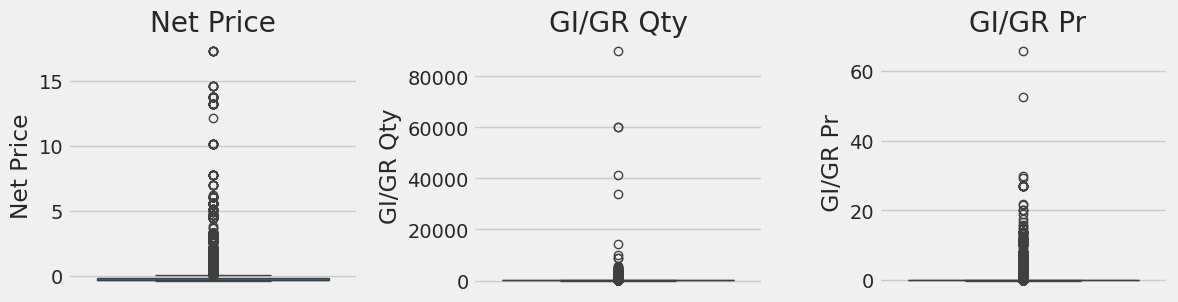

In [ ]:
# prompt: code blox plot for numerical columns

# Box plots for numerical columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df2[col])
    plt.title(col)
plt.tight_layout()
plt.show()


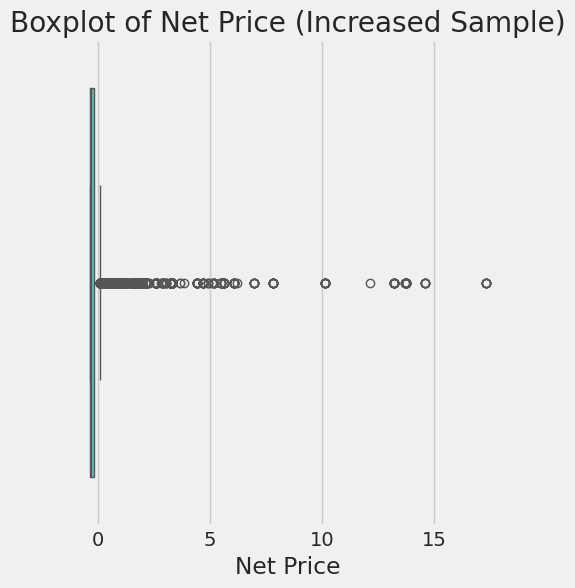

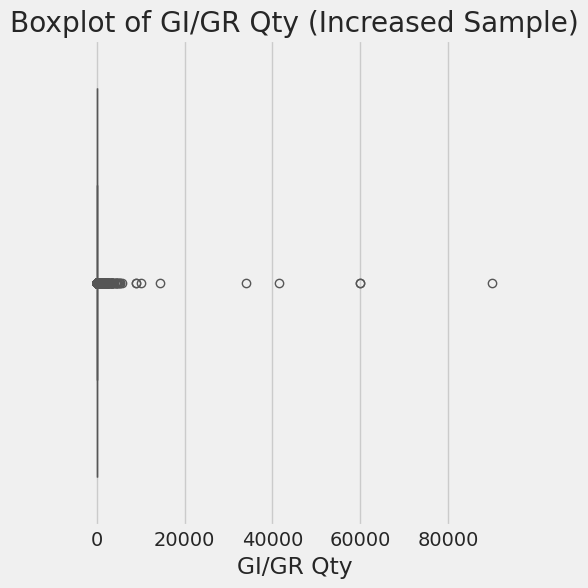

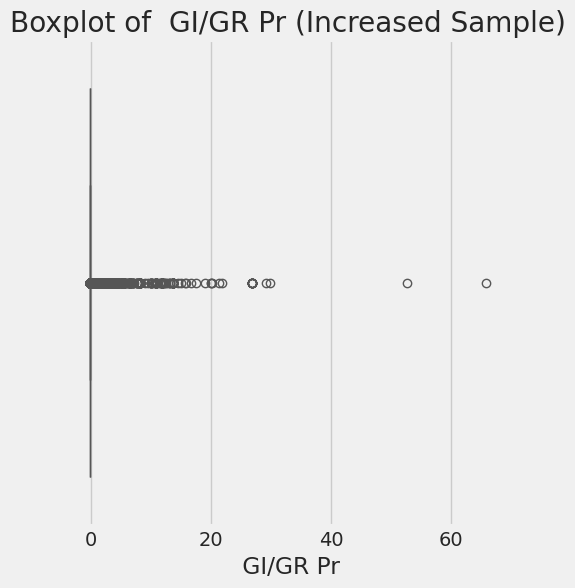

In [ ]:
for column in df2.select_dtypes(include=['number']):
    plt.figure()  # Create a new figure for each plot
    sns.boxplot(x=df2[column], showfliers=True, color='turquoise')  # Show outliers
    plt.title(f"Boxplot of {column} (Increased Sample)")
    plt.show()

#### Increasing Sample Using Bootstrapping Method and Handling Outliers

**Bootstrapping** </p>
Use it when we need to estimate the variability or distribution of the data or when we want to improve statistical estimates and outlier detection.

**Why not SMOTE?** </p>
SMOTE is purposely designed specifically to address class imbalance in classification problems

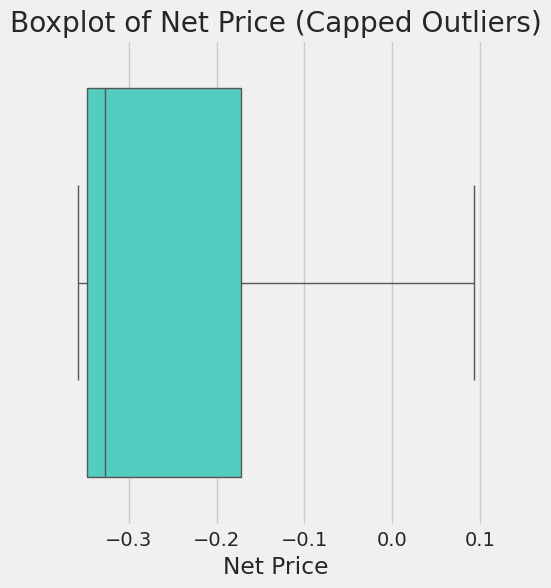

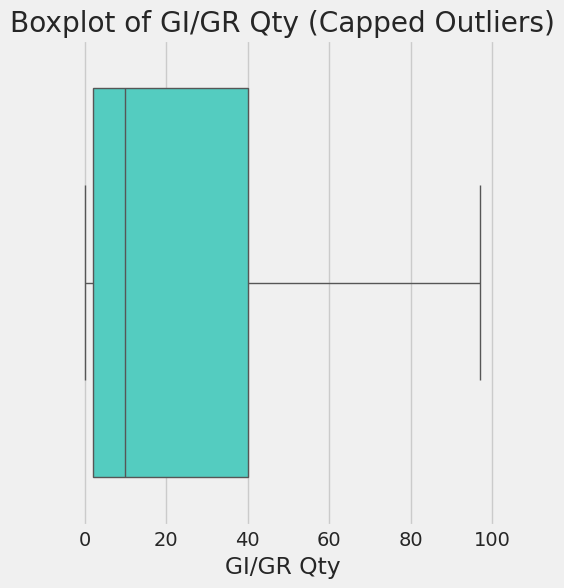

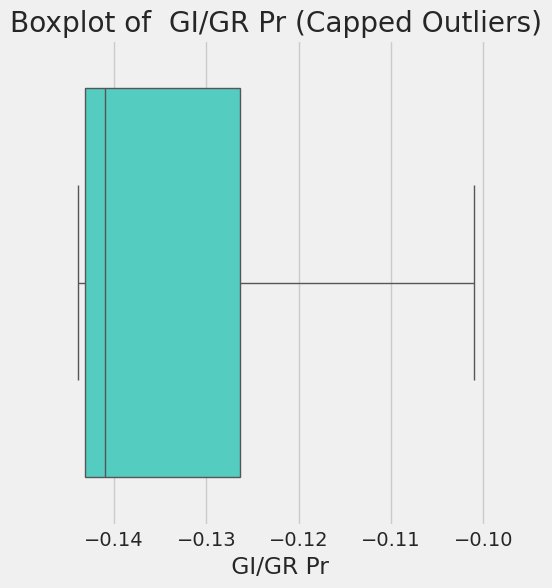

In [ ]:
# Increase sample size for more robust outlier detection
increased_sample_df = df2.sample(frac=2, replace=True, random_state=1)

# Iterate through numerical columns and create boxplots with outlier handling
for column in increased_sample_df.select_dtypes(include=['number']):

    # Calculate IQR and identify outliers
    Q1 = increased_sample_df[column].quantile(0.25)
    Q3 = increased_sample_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers to the upper and lower bounds
    capped_df = increased_sample_df.copy()
    capped_df[column] = np.clip(capped_df[column], lower_bound, upper_bound)

    plt.figure()  # Create a new figure for each plot
    sns.boxplot(x=capped_df[column], showfliers=True, color='turquoise')  # Show outliers
    plt.title(f"Boxplot of {column} (Capped Outliers)")
    plt.show()


In [ ]:
increased_sample_df.shape

(86962, 10)

### Relationship Between Two Continuous Variables

After normalizing the numerical features in the dataset, we performed a correlation analysis to understand the relationships between different features and the target variable GI/GR Qty. Correlation analysis helps in identifying how strongly the features are related to each other and to the target variable.

In [ ]:
increased_sample_df.corr(numeric_only=True)

,Net Price,GI/GR Qty,GI/GR Pr
Net Price,1.000000,-0.003503,0.403190
GI/GR Qty,-0.003503,1.000000,0.115118
GI/GR Pr,0.403190,0.115118,1.000000


The correlation matrix shows that the correlation coefficients between the features and the target variable `GI/GR Qty` are generally weak. For example, the correlation between `Net Price` and `GI/GR Qty` is `-0.001449`, indicating a very weak negative relationship. Similarly, other features also exhibit weak correlations with `GI/GR Qty`.

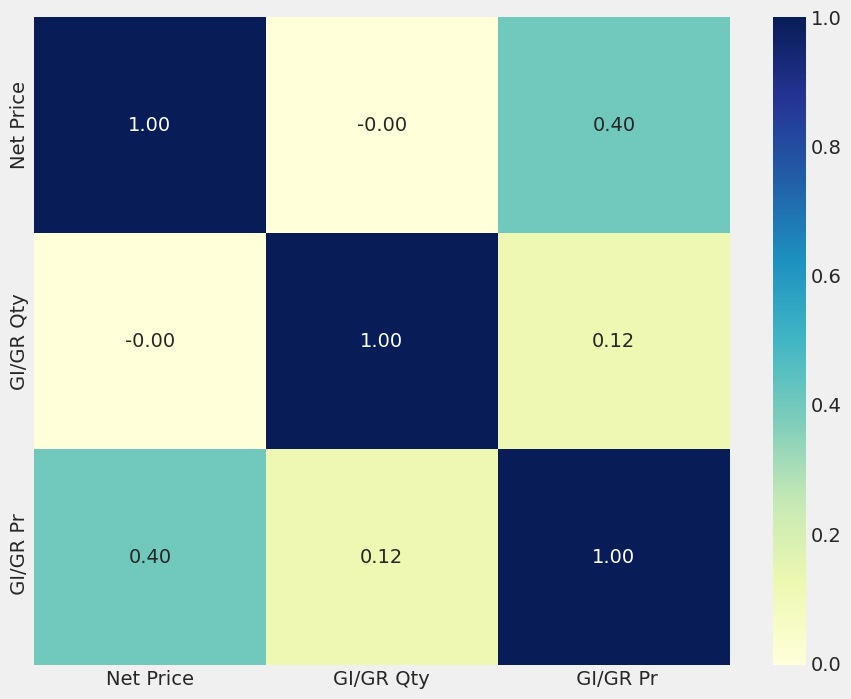

In [ ]:
#Heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(increased_sample_df.select_dtypes(include=['number']).corr(), annot=True, fmt=".2f",cmap="YlGnBu")
plt.show()


The correlation heatmap analysis above indicates that the numerical features do not exhibit strong linear relationships with each other. The absence of significant correlations (except for the self-correlations along the diagonal) suggests that each numerical feature contributes unique information to the dataset. This insight can be leveraged in subsequent steps of feature selection and model building.

We used the `sns.pairplot()` function from `Seaborn` to generate a matrix of scatter plots, displaying the pairwise relationships between all numerical features in the dataset. The diagonal of the matrix shows histograms (or density plots) representing the distribution of each individual numerical feature.

In [ ]:
#scatterplot
#sns.pairplot(increased_sample_df.select_dtypes(include=['number']))
#plt.show()


Upon visual inspection of the scatter plots, we observed the following:

* No Linear Relationship: The scatter plots did not reveal any clear linear relationships between the numerical features. The data points are dispersed in a way that does not form a straight line, indicating the absence of a strong linear correlation.

* No Trending Pattern: There were no discernible patterns or trends in the scatter plots. The data points are scattered randomly, suggesting that the features do not exhibit any predictable or consistent relationship.

* Outliers: Unusual data points can be seen deviate significantly from the overall distribution/

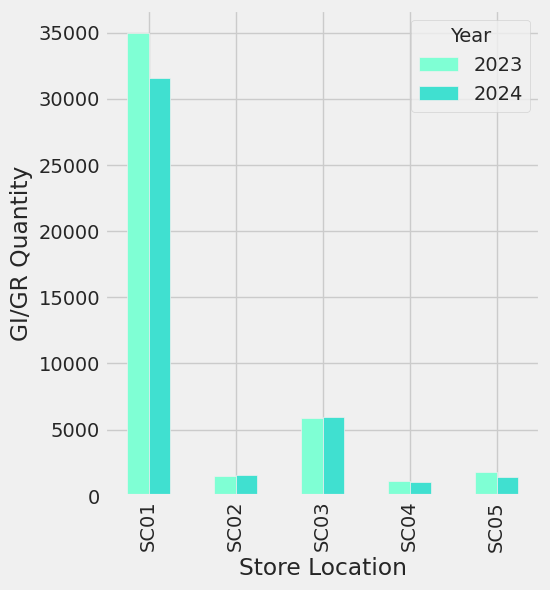

In [ ]:
pd.crosstab(increased_sample_df['Stor. Loc.'],increased_sample_df['Year']).plot(kind='bar', color=['aquamarine','turquoise'])
plt.xlabel('Store Location')
plt.ylabel('GI/GR Quantity')
plt.show()

In [ ]:
#Anova between categorical variables in X and continuous variable y
#Define X and y
import pandas as pd
from sklearn.feature_selection import f_classif # Import the missing function
import numpy as np

X = increased_sample_df.loc[:, increased_sample_df.columns != 'GI/GR Qty']
y = increased_sample_df['GI/GR Qty']

anova_results = []  # Changed to a list

# Iterate over categorical variables in X
for cat_col in X.select_dtypes(include=['object']):
    # Perform ANOVA F-test for each categorical variable
    f_statistic, p_value = f_classif(np.array(increased_sample_df[cat_col].astype('category').cat.codes).reshape(-1, 1), y)

    # Append the results to the list
    anova_results.append({  # Now appending to a list
        'Feature': cat_col,
        'F-statistic': f_statistic[0],
        'p-value': p_value[0]
    })

# Create a pandas DataFrame from the results
anova_df = pd.DataFrame(anova_results)

# Print the DataFrame as a table
anova_df

,Feature,F-statistic,p-value
0,Material Description,39.591740,0.000000e+00
1,Month,3.134888,4.529294e-95
2,Year,4.289845,4.354833e-173
3,Stor. Loc.,14.635709,0.000000e+00
4,Cost Ctr,9.555867,0.000000e+00
5,Rec. Plant,9.509903,0.000000e+00


## Feature Selection

**Correlation Matrix:**

|              | Net Price | GI/GR Qty | GI/GR Pr  |
|--------------|-----------|-----------|-----------|
| **Net Price**| 1.000000  | -0.003503 | 0.403190  |
| **GI/GR Qty**| -0.003503 | 1.000000  | 0.115117  |
| **GI/GR Pr** | 0.403190  | 0.115117  | 1.000000  |

Rationale for Including 'Net Price' and 'GI/GR Pr'
Despite the weak correlation values, 'Net Price' and 'GI/GR Pr' are included in the feature selection for the following reasons:

1. Potential Interaction Effects: Even though 'Net Price' and 'GI/GR Pr' show weak individual correlations with 'GI/GR Qty', they may still interact with other features in a non-linear manner, contributing valuable information to the model.
2. Comprehensive Modeling: Including 'Net Price' and 'GI/GR Pr' ensures that the model has access to all potentially relevant information, capturing various aspects of the data that might influence 'GI/GR Qty'.
3. Feature Importance Assessment: During the modeling phase, feature importance techniques (such as those provided by tree-based models) will help assess the actual contribution of 'Net Price' and 'GI/GR Pr' to the model's predictive performance. This step will validate whether these features are significant.
4. Domain Knowledge: In practical scenarios, 'Net Price' and 'GI/GR Pr' are expected to have some influence on inventory quantities due to economic factors and pricing strategies, thus justifying their inclusion.


**ANOVA:**

| Feature              | F-statistic | p-value           |
|----------------------|-------------|-------------------|
| Material Description | 38.234264   | 0.000000e+00      |
| Month                | 3.083961    | 6.290213e-96      |
| Year                 | 4.204038    | 1.738181e-174     |
| Stor. Loc.           | 14.098138   | 0.000000e+00      |
| Cost Ctr             | 9.422857    | 0.000000e+00      |
| Rec. Plant           | 9.380495    | 0.000000e+00      |


Based on the ANOVA results, all features show statistically significant relationships with the target variable, as indicated by their low p-values. However, in the context of model development, practical considerations must also be taken into account alongside statistical significance.

**Rationale for Excluding 'Month' and 'Year'**
Although the features 'Month' and 'Year' have statistically significant p-values, indicating they are related to the target variable, they are excluded from the final feature set for the following reasons:

1. Temporal Granularity: Including 'Month' and 'Year' can introduce temporal granularity into the model, which may not be necessary for capturing the underlying patterns in the data. Temporal effects might be better captured by other more meaningful features.
2. Potential Redundancy: The temporal features might introduce multicollinearity or redundancy if other features in the dataset already capture seasonal or annual trends.
3. Model Simplicity: Simplifying the model by reducing the number of features can lead to better generalization and interpretability. By excluding 'Month' and 'Year', the model remains focused on the most impactful features.

As a result, the features 'Material Description', 'Stor. Loc.', 'Cost Ctr', and 'Rec. Plant' will be included in the final model. These features not only show strong statistical significance but also provide meaningful information relevant to the prediction task.

### Selected Features

| Feature            | Data Type    | Description                                                                                 | Rationale for Selection                                           |
|--------------------|--------------|---------------------------------------------------------------------------------------------|------------------------------------------------------------------|
| Material Description | Categorical | Describes the type of material involved in the transaction.                                | High F-statistic and significant p-value indicate its relevance. |
| Stor. Loc.          | Categorical | Indicates the storage location of the material.                                            | Shows a significant relationship with the target variable.       |
| Cost Ctr            | Categorical | Represents the cost center associated with the transaction.                                 | Significant F-statistic and p-value suggest its impact.           |
| Rec. Plant          | Categorical | Specifies the plant where the material is received.                                         | Important for understanding variations in the target variable.    |
| Net Price           | Continuous   | Reflects the net price of the material.                                                     | Although weakly correlated, it may capture economic factors affecting the target variable. |
| GI/GR Pr            | Continuous   | Represents the goods issue/goods receipt price.                                             | Shows moderate correlation with the target variable.             |
| GI Date             | Datetime     | Date of the goods issue or receipt.                                                         | Allows for time-based analysis, capturing seasonal or temporal trends. |


# Modelling

####Encode categorical features

In [ ]:
#encode categorical variables in increased sample dataframe

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#Ensure categorical_cols contains the actual column names present in df2
categorical_cols = ['Material Description','GI Date', 'Stor. Loc.', 'Cost Ctr', 'Rec. Plant']
for col in categorical_cols:
  increased_sample_df[col] = le.fit_transform(increased_sample_df[col])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Mean Squared Error: {(mean_squared_error(y_train, pred)*100):.2f}")
        print("_______________________________________________")
        print(f"R-squared: {(r2_score(y_train, pred)*100):.2f}")
        print("_______________________________________________")

    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")
        print(f"Mean Squared Error: {(mean_squared_error(y_test, pred)*100):.2f}")
        print("_______________________________________________")
        print(f"R-squared: {(r2_score(y_test, pred)*100):.2f}")
        print("_______________________________________________")

###Train test Split

In [ ]:
from sklearn.model_selection import train_test_split
#Define X and y
X = increased_sample_df[['Material Description', 'Net Price', 'GI Date', 'Stor. Loc.',' GI/GR Pr', 'Cost Ctr', 'Rec. Plant']].values
y = increased_sample_df['GI/GR Qty']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X_test.shape,
y_test.shape,
X_train.shape,
y_train.shape)

(26089, 7) (26089,) (60873, 7) (60873,)


#### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression # Import a model that can make predictions
from sklearn.pipeline import make_pipeline

# Create a pipeline that first transforms the features, then fits a model
poly_model = make_pipeline(PolynomialFeatures(), LinearRegression())
poly_model.fit(X_train, y_train)

# Now you can use the pipeline to make predictions and evaluate the model
print_score(poly_model, X_train, y_train, X_test, y_test, train=True)
print_score(poly_model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Mean Squared Error: 66997615.44
_______________________________________________
R-squared: 16.75
_______________________________________________
Test Result:
Mean Squared Error: 46510121.01
_______________________________________________
R-squared: 14.28
_______________________________________________


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

test_score = r2_score(y_test, poly_model.predict(X_test)) * 100
train_score = r2_score(y_train, poly_model.predict(X_train)) * 100

results_table2 = pd.DataFrame(data=[["Polynomial Regression", train_score, test_score]],
  columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_table2

,Model,Training Accuracy %,Testing Accuracy %
0,Polynomial Regression,16.749186,14.278598


#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

print_score(dt_reg, X_train, y_train, X_test, y_test, train=True)
print_score(dt_reg, X_train, y_train, X_test, y_test, train=False)

Train Result:
Mean Squared Error: 33.94
_______________________________________________
R-squared: 100.00
_______________________________________________
Test Result:
Mean Squared Error: 58535.85
_______________________________________________
R-squared: 99.89
_______________________________________________


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

test_score = r2_score(y_test, dt_reg.predict(X_test)) * 100
train_score = r2_score(y_train, dt_reg.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Decision Tree", train_score, test_score]],
  columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_table2 = pd.concat([results_table2, results_df], ignore_index=True)
results_table2

,Model,Training Accuracy %,Testing Accuracy %
0,Polynomial Regression,16.749186,14.278598
1,Decision Tree,99.999958,99.892114


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

print_score(rf_reg, X_train, y_train, X_test, y_test, train=True)
print_score(rf_reg, X_train, y_train, X_test, y_test, train=False)

Train Result:
Mean Squared Error: 128436.20
_______________________________________________
R-squared: 99.84
_______________________________________________
Test Result:
Mean Squared Error: 345164.09
_______________________________________________
R-squared: 99.36
_______________________________________________


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

test_score = r2_score(y_test, rf_reg.predict(X_test)) * 100
train_score = r2_score(y_train, rf_reg.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Random Forest", train_score, test_score]],
  columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_table2 = pd.concat([results_table2, results_df], ignore_index=True)
results_table2

,Model,Training Accuracy %,Testing Accuracy %
0,Polynomial Regression,16.749186,14.278598
1,Decision Tree,99.999958,99.892114
2,Random Forest,99.840406,99.363838


#### XGBoost

In [ ]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)

print_score(xgb_reg, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_reg, X_train, y_train, X_test, y_test, train=False)

Train Result:
Mean Squared Error: 3335.80
_______________________________________________
R-squared: 100.00
_______________________________________________
Test Result:
Mean Squared Error: 44287.03
_______________________________________________
R-squared: 99.92
_______________________________________________


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

test_score = r2_score(y_test, xgb_reg.predict(X_test)) * 100
train_score = r2_score(y_train, xgb_reg.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["XGBoost", train_score, test_score]],
  columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_table2 = pd.concat([results_table2, results_df], ignore_index=True)
results_table2

,Model,Training Accuracy %,Testing Accuracy %
0,Polynomial Regression,16.749186,14.278598
1,Decision Tree,99.999958,99.892114
2,Random Forest,99.840406,99.363838
3,XGBoost,99.995855,99.918376


# Cross-Validation

Cross-validation is used to assess a model's performance and ensure its generalizability. Here's why it's important

1. Reduce Overfitting: It helps detect if a model is overfitting to the training data by testing it on multiple subsets of the data. Overfitting occurs when a model performs well on the training data but poorly on unseen data.

2. Estimate Model Performance: Provides a more reliable estimate of how the model will perform on new, unseen data by averaging results across multiple folds or splits.

3. Maximize Data Utilization: Every observation in the dataset is used for both training and testing, ensuring that the model is evaluated on all available data.

4. Identify Model Variability: Helps to identify how sensitive the model’s performance is to the specific data splits, giving insight into the model's stability and robustness.

5. Tune Hyperparameters: Assists in selecting the best hyperparameters by evaluating model performance across different settings.

In [ ]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution for hyperparameter tuning
param_dist = {
    'n_estimators': stats.randint(10, 1000),
    'max_depth': stats.randint(1, 10),
    'learning_rate': stats.uniform(0, 1),
    'reg_alpha': stats.randint(0, 2),         # Randomly sample between 0 and 2
    'reg_lambda': stats.randint(1, 4)         # Randomly sample between 1 and 4
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    cv=5,  # Number of cross-validation folds
    scoring='r2',  # Use R-squared as the evaluation metric
    random_state=42,
)

# Perform hyperparameter tuning
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the XGBoost model with the best hyperparameters
best_xgb_reg = xgb.XGBRegressor(**best_params, random_state=42)
best_xgb_reg.fit(X_train, y_train)

# Evaluate the model
print_score(best_xgb_reg, X_train, y_train, X_test, y_test, train=True)
print_score(best_xgb_reg, X_train, y_train, X_test, y_test, train=False)

Best Hyperparameters: {'learning_rate': 0.2912291401980419, 'max_depth': 3, 'n_estimators': 885, 'reg_alpha': 0, 'reg_lambda': 1}
Train Result:
Mean Squared Error: 12748.25
_______________________________________________
R-squared: 99.98
_______________________________________________
Test Result:
Mean Squared Error: 55586.48
_______________________________________________
R-squared: 99.90
_______________________________________________


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_xgb_reg, X, y, cv=5, scoring='r2', verbose=2)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the average cross-validation score
average_cv_score = (cv_scores.mean()*100)
print("Average Cross-Validation Score:", average_cv_score)


[CV] END .................................................... total time=   2.8s
[CV] END .................................................... total time=   2.7s
[CV] END .................................................... total time=   3.9s
[CV] END .................................................... total time=   4.0s
[CV] END .................................................... total time=   2.7s
Cross-Validation Scores: [0.99691623 0.99941294 0.99905927 0.99746817 0.99137301]
Average Cross-Validation Score: 99.68459235309585


XGBoost is the best performing model in terms of both prediction error (RMSE) and explained variance (R²). The Decision Tree and Random Forest models also perform well, while Polynomial Regression models show weaker performance.

#### Features Importance According to XGBoost

In [ ]:
# Create a dictionary mapping Material Description from increased_sample_df to Material Description in df
material_description_mapping = dict(zip(df['Material Description'].unique(), increased_sample_df['Material Description'].unique()))

# Create a dictionary mapping GI Date from increased_sample_df to GI Date in df
gi_date_mapping = dict(zip(increased_sample_df['GI Date'].unique(), df['GI Date'].unique()))

# Create a dictionary mapping Stor. Loc. from increased_sample_df to Stor. Loc. in df
stor_loc_mapping = dict(zip(increased_sample_df['Stor. Loc.'].unique(), df['Stor. Loc.'].unique()))

# Create a dictionary mapping Cost Ctr from increased_sample_df to Cost Ctr in df
cost_ctr_mapping = dict(zip(increased_sample_df['Cost Ctr'].unique(), df['Cost Ctr'].unique()))

# Create a dictionary mapping Rec. Plant from increased_sample_df to Rec. Plant in df
rec_plant_mapping = dict(zip(increased_sample_df['Rec. Plant'].unique(), df['Rec. Plant'].unique()))

# Print the dictionaries
print("Material Description Mapping:", material_description_mapping)
print("GI Date Mapping:", gi_date_mapping)
print("Stor. Loc. Mapping:", stor_loc_mapping)
print("Cost Ctr Mapping:", cost_ctr_mapping)
print("Rec. Plant Mapping:", rec_plant_mapping)


Material Description Mapping: {'HOLLOW BAR(M/S)11/2\'\'X11/2\'\' X1/8"X20\'': 206, 'HOLLOW BAR(M/S) 1" X 2" X 3MM': 714, "HOLLOW BAR(M/S)1'' X 1'' X 3MM X 20'": 197, "HOLLOW BAR(M/S)2'' X 2'' X 1/8 X 20'": 580, 'HOLLOW BAR(M/S) 4" X 2" X 3MM': 228, 'HOLLOW BAR(M/S)4" X 4" X 1/8"': 243, "FLAT BAR(M/S)1'' X 1/8'' X 20'": 546, "ANGLE BAR(M/S)1'' X 1'' X 1/8 X 20FT": 418, "ANGLE BAR(M/S)2'' X 2'' X 1/8'' X 20FT": 311, 'FLAT BAR(S/S) 1" X 3MM X 20\'': 196, 'FLAT BAR(S/S)2" X 1/8" X 20"': 9, 'FLAT BAR(S/S)3 X 1/8 X 20"': 218, 'BEARING UCF205-100(1") NTN': 252, 'BEARING UCF315-300(3") NTN': 441, 'BEARING UCP208-108(1 1/2") NTN': 494, 'BEARING UCP215-300(3") NTN': 213, 'BEARING UCF211-200(2") NTN': 683, 'VEE BELT(A:12MM)31': 624, 'VEE BELT(A:12MM)32': 368, 'VEE BELT(A:12MM)33': 236, 'VEE BELT(A:12MM)34': 511, 'VEE BELT(A:12MM)35': 566, 'VEE BELT(A:12MM)36': 96, 'VEE BELT(A:12MM)38': 171, 'VEE BELT(A:12MM)48': 372, 'VEE BELT(A:12MM)50': 395, 'VEE BELT(B:15MM)36': 523, 'VEE BELT(B:15MM)44': 573,

In [ ]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = best_xgb_reg.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

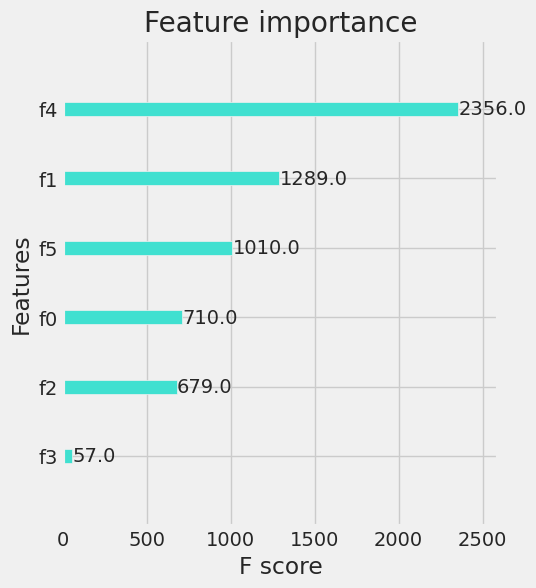

In [ ]:
import matplotlib.pyplot as plt
# Feature Importance
xgb.plot_importance(best_xgb_reg, importance_type='weight', max_num_features=10, color='turquoise')
plt.rcParams["figure.figsize"] = (5, 6) # resize
plt.show()

# Deployment

In [ ]:
# Create a dictionary mapping Material Description from increased_sample_df to Material Description in df
material_description_mapping = dict(zip(df['Material Description'].unique(), increased_sample_df['Material Description'].unique()))

# Create a dictionary mapping GI Date from increased_sample_df to GI Date in df
gi_date_mapping = dict(zip(increased_sample_df['GI Date'].unique(), df['GI Date'].unique()))

# Create a dictionary mapping Stor. Loc. from increased_sample_df to Stor. Loc. in df
stor_loc_mapping = dict(zip(increased_sample_df['Stor. Loc.'].unique(), df['Stor. Loc.'].unique()))

# Create a dictionary mapping Cost Ctr from increased_sample_df to Cost Ctr in df
cost_ctr_mapping = dict(zip(increased_sample_df['Cost Ctr'].unique(), df['Cost Ctr'].unique()))

# Create a dictionary mapping Rec. Plant from increased_sample_df to Rec. Plant in df
rec_plant_mapping = dict(zip(increased_sample_df['Rec. Plant'].unique(), df['Rec. Plant'].unique()))

# Print the dictionaries
print("Material Description Mapping:", material_description_mapping)
print("GI Date Mapping:", gi_date_mapping)
print("Stor. Loc. Mapping:", stor_loc_mapping)
print("Cost Ctr Mapping:", cost_ctr_mapping)
print("Rec. Plant Mapping:", rec_plant_mapping)


Material Description Mapping: {'HOLLOW BAR(M/S)11/2\'\'X11/2\'\' X1/8"X20\'': 206, 'HOLLOW BAR(M/S) 1" X 2" X 3MM': 714, "HOLLOW BAR(M/S)1'' X 1'' X 3MM X 20'": 197, "HOLLOW BAR(M/S)2'' X 2'' X 1/8 X 20'": 580, 'HOLLOW BAR(M/S) 4" X 2" X 3MM': 228, 'HOLLOW BAR(M/S)4" X 4" X 1/8"': 243, "FLAT BAR(M/S)1'' X 1/8'' X 20'": 546, "ANGLE BAR(M/S)1'' X 1'' X 1/8 X 20FT": 418, "ANGLE BAR(M/S)2'' X 2'' X 1/8'' X 20FT": 311, 'FLAT BAR(S/S) 1" X 3MM X 20\'': 196, 'FLAT BAR(S/S)2" X 1/8" X 20"': 9, 'FLAT BAR(S/S)3 X 1/8 X 20"': 218, 'BEARING UCF205-100(1") NTN': 252, 'BEARING UCF315-300(3") NTN': 441, 'BEARING UCP208-108(1 1/2") NTN': 494, 'BEARING UCP215-300(3") NTN': 213, 'BEARING UCF211-200(2") NTN': 683, 'VEE BELT(A:12MM)31': 624, 'VEE BELT(A:12MM)32': 368, 'VEE BELT(A:12MM)33': 236, 'VEE BELT(A:12MM)34': 511, 'VEE BELT(A:12MM)35': 566, 'VEE BELT(A:12MM)36': 96, 'VEE BELT(A:12MM)38': 171, 'VEE BELT(A:12MM)48': 372, 'VEE BELT(A:12MM)50': 395, 'VEE BELT(B:15MM)36': 523, 'VEE BELT(B:15MM)44': 573,

In [ ]:
import gradio as gr

# Assuming 'df' and 'increased_sample_df' are defined and available

# Create mappings for categorical features (if needed)
material_description_mapping = dict(zip(df['Material Description'].unique(), increased_sample_df['Material Description'].unique()))
gi_date_mapping = dict(zip(df['GI Date'].unique(), increased_sample_df['GI Date'].unique()))
stor_loc_mapping = dict(zip(df['Stor. Loc.'].unique(), increased_sample_df['Stor. Loc.'].unique()))
cost_ctr_mapping = dict(zip(df['Cost Ctr'].unique(), increased_sample_df['Cost Ctr'].unique()))
rec_plant_mapping = dict(zip(df['Rec. Plant'].unique(), increased_sample_df['Rec. Plant'].unique()))

# Define the prediction function
def predict_quantity(Material_Description, Net_Price, GI_Date, Stor_Loc, GI_GR_Pr, Cost_Ctr, Rec_Plant):
    # Map input values to encoded values (if necessary)
    Material_Description = material_description_mapping.get(Material_Description, 0)
    GI_Date = gi_date_mapping.get(GI_Date, 0)
    Stor_Loc = stor_loc_mapping.get(Stor_Loc, 0)
    Cost_Ctr = cost_ctr_mapping.get(Cost_Ctr, 0)
    Rec_Plant = rec_plant_mapping.get(Rec_Plant, 0)

    # Prepare input data for prediction
    input_data = pd.DataFrame({
        'Material Description': [Material_Description],
        'Net Price': [Net_Price],
        'GI Date': [GI_Date],
        'Stor. Loc.': [Stor_Loc],
        'GI GR Pr': [GI_GR_Pr],
        'Cost Ctr': [Cost_Ctr],
        'Rec. Plant': [Rec_Plant]
    })

    # Make prediction
    prediction = best_xgb_reg.predict(input_data)[0]
    return f"Predicted Quantity: {int(prediction)}"

# Create Gradio interface
inputs = [
    gr.Dropdown(list(material_description_mapping.keys()), label="Material Description"),
    gr.Slider(minimum=0, maximum=2000, label="Net Price"),  # Adjust range as needed
    gr.Dropdown(list(gi_date_mapping.keys()), label="Shipment Date"),
    gr.Dropdown(list(stor_loc_mapping.keys()), label="Store Location"),
    gr.Slider(minimum=0, maximum=2000, label="Predicted Price"),  # Adjust range as needed
    gr.Dropdown(list(cost_ctr_mapping.keys()), label="Cost Center"),
    gr.Dropdown(list(rec_plant_mapping.keys()), label="Receiving Plant")
]

output = gr.Textbox(label="Prediction")

interface = gr.Interface(
    fn=predict_quantity,
    inputs=inputs,
    outputs=output,
    title="Inventory Demand Prediction",
    description="Predicting How Many Items Will Be Received or Delivered using XGBoost model"
)

interface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://19afca634e22061ba9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
